Métricas de Agrupamiento (K-means y DBSCAN) (Core)
 Descripción:

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

Enlace al dataset: [Credit Card Data](https://www.kaggle.com/arjunbhasin2013/ccdata)



Objetivo:

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.



Instrucciones:


In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN


1. Carga de datos:

  - Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
  - Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.


In [2]:
#importar credit card
cc = pd.read_csv('../data/CC GENERAL.csv')
cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Resumen del Dataset**

Este caso requiere desarrollar una segmentación de clientes para definir una estrategia de marketing. El conjunto de datos proporciona información sobre el comportamiento de uso de aproximadamente 9000 titulares de tarjetas de crédito activos durante los últimos 6 meses. El archivo se encuentra a nivel de cliente con 18 variables de comportamiento. 

**Diccionario de Datos para el Dataset de Tarjeta de Crédito:**

* **CUST_ID:** Identificación del titular de la tarjeta de crédito (Categorical)
* **BALANCE:** Saldo restante en la cuenta para realizar compras
* **BALANCE_FREQUENCY:** Frecuencia de actualización del saldo, puntuación entre 0 y 1 (1 = actualizado frecuentemente, 0 = no actualizado frecuentemente)
* **PURCHASES:** Monto total de compras realizadas
* **ONEOFF_PURCHASES:** Monto máximo de compra realizado de una sola vez
* **INSTALLMENTS_PURCHASES:** Monto de compras realizadas en cuotas
* **CASH_ADVANCE:** Adelanto de efectivo solicitado por el usuario
* **PURCHASES_FREQUENCY:** Frecuencia de compras realizadas, puntuación entre 0 y 1 (1 = comprado frecuentemente, 0 = no comprado frecuentemente)
* **ONEOFFPURCHASESFREQUENCY:** Frecuencia de compras realizadas de una sola vez (1 = comprado frecuentemente, 0 = no comprado frecuentemente)
* **PURCHASESINSTALLMENTSFREQUENCY:** Frecuencia de compras realizadas en cuotas (1 = realizado frecuentemente, 0 = no realizado frecuentemente)
* **CASHADVANCEFREQUENCY:** Frecuencia de adelantos de efectivo solicitados
* **CASHADVANCETRX:** Número de transacciones realizadas con "Adelanto de efectivo"
* **PURCHASES_TRX:** Número de transacciones de compra realizadas
* **CREDIT_LIMIT:** Límite de crédito de la tarjeta de crédito del usuario
* **PAYMENTS:** Monto total de pagos realizados por el usuario
* **MINIMUM_PAYMENTS:** Monto mínimo de pagos realizados por el usuario
* **PRCFULLPAYMENT:** Porcentaje de pago total realizado por el usuario
* **TENURE:** Antigüedad del servicio de tarjeta de crédito del usuario


In [5]:
# Información general del dataset
print(cc.info())

# Mostrar las primeras filas
cc.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Comprobar valores faltantes
print(cc.isnull().sum())

# Estadísticas descriptivas de las columnas numéricas
cc.describe()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


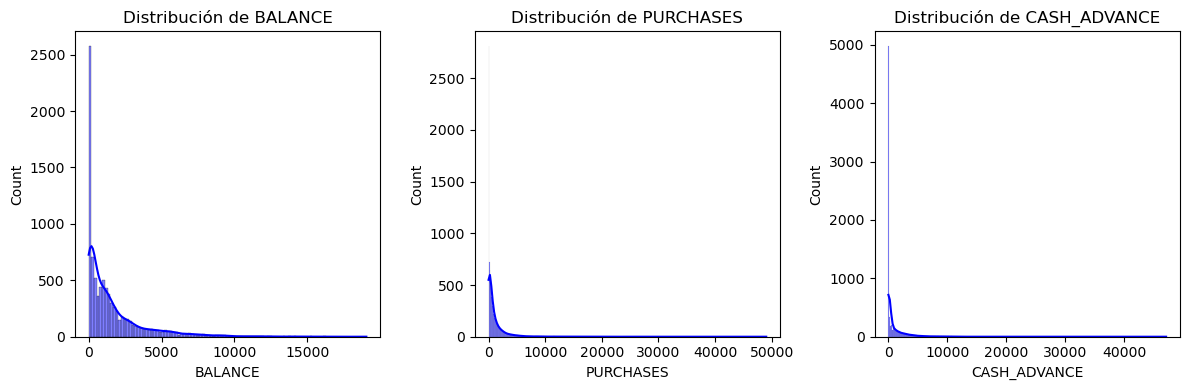

In [7]:
# Gráficos de distribución
variables_interes = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']
plt.figure(figsize=(12, 4))

for i, col in enumerate(variables_interes):
    plt.subplot(1, 3, i + 1)
    sns.histplot(cc[col], kde=True, color="blue")
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()



2. Exploración y preprocesamiento de datos:

  - Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
  - Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
  - Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.


In [8]:
# Imputar valores faltantes
cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].median(), inplace=True)
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].median(), inplace=True)

# Eliminar columnas irrelevantes
cc.drop(columns=['CUST_ID'], inplace=True)  # No aporta al clustering

# Confirmar que no haya valores nulos
print(cc.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\diego\AppData\Local\Temp\ipykernel_5836\2054000374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].median(), inplace=True)
C:\Users\diego\AppData\Local\Temp\ipykernel_5836\2054000374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [9]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cc)



3. Aplicación de K-means y DBSCAN:
  - Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.
  - Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Aplicar K-means con un número inicial de clusters (ej. 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluación del K-means
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(scaled_data, kmeans_labels)

print("K-means:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {calinski_kmeans:.4f}")


K-means:
Silhouette Score: 0.1665
Calinski-Harabasz Index: 1325.1283


In [11]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Filtrar etiquetas de ruido (-1)
filtered_labels = dbscan_labels[dbscan_labels != -1]
filtered_data = scaled_data[dbscan_labels != -1]

# Evaluación de DBSCAN
if len(set(filtered_labels)) > 1:  # Evitar errores si DBSCAN no forma clusters
    silhouette_dbscan = silhouette_score(filtered_data, filtered_labels)
    calinski_dbscan = calinski_harabasz_score(filtered_data, filtered_labels)
    print("DBSCAN:")
    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_dbscan:.4f}")
else:
    print("DBSCAN no encontró suficientes clusters para evaluar.")


DBSCAN no encontró suficientes clusters para evaluar.


 
4. Comparación mediante métricas:
  - Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
    - Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
    - Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
  - Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.


In [12]:
print("\nResumen de métricas:")
print(f"K-means - Silhouette Score: {silhouette_kmeans:.4f}, Calinski-Harabasz: {calinski_kmeans:.4f}")
if len(set(filtered_labels)) > 1:
    print(f"DBSCAN - Silhouette Score: {silhouette_dbscan:.4f}, Calinski-Harabasz: {calinski_dbscan:.4f}")
else:
    print("DBSCAN no formó clusters utilizables.")



Resumen de métricas:
K-means - Silhouette Score: 0.1665, Calinski-Harabasz: 1325.1283
DBSCAN no formó clusters utilizables.


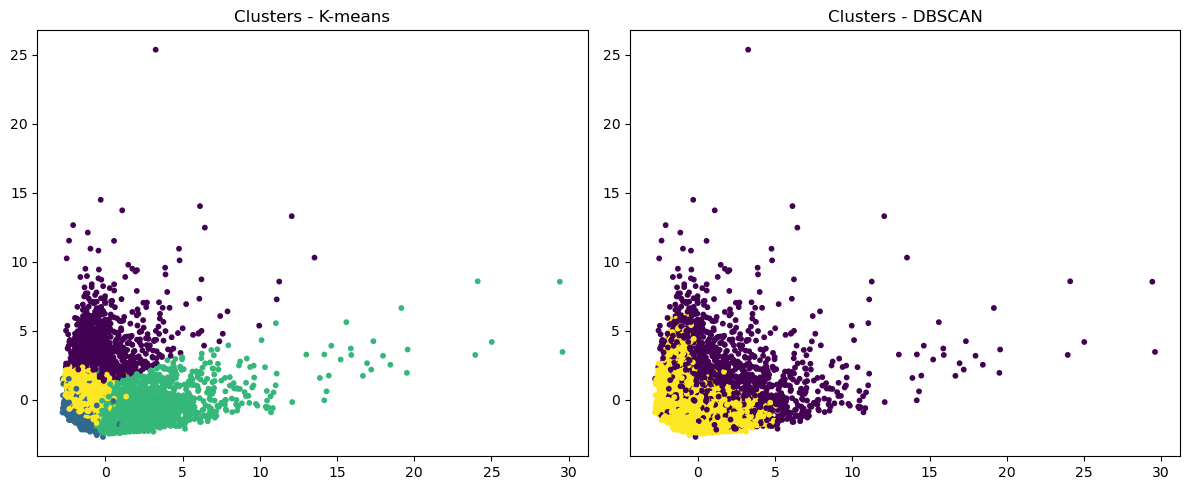

In [13]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualizar los clusters de K-means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("Clusters - K-means")

# Visualizar los clusters de DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Clusters - DBSCAN")

plt.tight_layout()
plt.show()



5. Interpretación de resultados:
  - Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
  - Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?




Interpretación de las métricas

1. Silhouette Score mide qué tan bien se agrupan los puntos dentro de un cluster y qué tan separados están de otros clusters:

- Un valor de 0.1665 indica que los clusters de K-means tienen baja cohesión y separación. Los valores cercanos a 1 son ideales.
- Sin embargo, K-means sí formó clusters, mientras que DBSCAN no.

2. Calinski-Harabasz Index mide la relación entre la dispersión interna de los clusters y la dispersión entre clusters:

- El valor de 1325.1283 en K-means muestra que el modelo logró cierta separación entre clusters, aunque con baja cohesión.

Conclusiones

1. Rendimiento de K-means vs. DBSCAN:

- K-means ofrece un mejor rendimiento en este dataset, ya que formó clusters utilizables.
- Sin embargo, los clusters son poco cohesivos y presentan algo de solapamiento (Silhouette Score bajo).

2. Outliers detectados por DBSCAN:

- DBSCAN fue capaz de identificar outliers, lo cual es útil para detectar clientes con comportamientos anómalos.
- Estos puntos pueden ser analizados más a fondo para entender si representan clientes con patrones de gasto extremos o errores en los datos.


Análisis de Resultados:

 - En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.
  - Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.





Conclusión:

 - Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.